In [2]:
%matplotlib inline

In [3]:
import urllib
from urllib.request import Request, urlopen
from io import StringIO
url = 'http://files.meetup.com/17411412/MeetupDataChallenge-1-Merge.csv'
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
res = urlopen(Request(url, data=None, headers={'User-Agent': user_agent}))
d = pd.read_csv(StringIO(res.read().decode('utf-8')), sep='\t')
d = d.rename(columns={'Final Yield 2': 'Yield'})
d.head()

,Run Number,Yield,Purity,Component,Lot ID,Stage,Class
0,1,16.75,75.5,Cassette 1,10004280,Stage 2,Materials - Parts
1,2,16.81,81.8,Cassette 1,10004280,Stage 2,Materials - Parts
2,3,16.96,67.0,Cassette 1,10004280,Stage 2,Materials - Parts
3,4,16.53,70.3,Cassette 1,10004280,Stage 2,Materials - Parts
4,5,18.55,80.1,Cassette 1,10004280,Stage 2,Materials - Parts


In [4]:
len(d)

17536

# Info:

- All Run Numbers have the same 32 Components associated
- The Lot ID associated with each component changes quite often between runs
- No Lot ID is ever associated with more than 1 component

In [5]:
d.groupby(['Component']).apply(lambda x: len(x['Lot ID'].unique())).order()[::-1]

Component
Buffer Salt 1           8
Salt B                  8
Salt A                  8
Buffer Salt 2           8
Buffer Salt 3           8
Buffer Salt 4           8
Buffer Salt 5           8
Cassette 1              8
Cassette 2              7
Filter 1                6
Filter 4b               6
Filter 4a               6
A buffer                6
Preservative            6
Flask Media             5
Filter 2                5
Stabilizer A            5
Culture Media           5
Filter 3                5
Media Feed 1            5
Media Feed 2            5
Stabilizer B            4
Disposable Assembly     4
Cassette 3              4
Detergent               3
Preservative A          2
Preservative B          2
Cold Room               2
Detergent Stage 2       2
Detergent Stage 4       2
Process Skid Stage 3    1
WFI Source              1
dtype: int64

In [6]:
d_lot = d.pivot_table(index=['Run Number', 'Yield', 'Purity'], columns=['Component'], values=['Lot ID'])
d_lot.head()

Lot ID                                            \
Component                A buffer Buffer Salt 1 Buffer Salt 2 Buffer Salt 3   
Run Number Yield Purity                                                       
1          16.75 75.5    20007262      20007269      20007270      20007271   
2          16.81 81.8    20007262      20007269      20007270      20007271   
3          16.96 67.0    20007262      20007269      20007270      20007271   
4          16.53 70.3    20007262      20007269      20007270      20007271   
5          18.55 80.1    20007262      20007269      20007270      20007271   

                                                                           \
Component               Buffer Salt 4 Buffer Salt 5 Cassette 1 Cassette 2   
Run Number Yield Purity                                                     
1          16.75 75.5        20007272      20007273   10004280   10004282   
2          16.81 81.8        20007272      20007273   10004280   10004282   
3          16.96 67.0        20007272      20007273   10004280   10004282   
4          16.53 70.3        20007272      20007273   10004280   10004282   
5          18.55 80.1        20007272      20007273   10004280   10004282   

                                                ...                   \
Component               Cassette 3 Cold Room    ...     Media Feed 2   
Run Number Yield Purity                         ...                    
1          16.75 75.5     10004288        19    ...         20007280   
2          16.81 81.8     10004288        19    ...         20007280   
3          16.96 67.0     10004288        19    ...         20007280   
4          16.53 70.3     10004288        19    ...         20007280   
5          18.55 80.1     10004288        19    ...         20007280   

                                                                    \
Component               Preservative Preservative A Preservative B   
Run Number Yield Purity                                              
1          16.75 75.5       20007263       20007274       20007275   
2          16.81 81.8       20007263       20007274       20007275   
3          16.96 67.0       20007263       20007274       20007275   
4          16.53 70.3       20007263       20007274       20007275   
5          18.55 80.1       20007263       20007274       20007275   

                                                                               \
Component               Process Skid Stage 3    Salt A    Salt B Stabilizer A   
Run Number Yield Purity                                                         
1          16.75 75.5               90000042  20007267  20007268     20007264   
2          16.81 81.8               90000042  20007267  20007268     20007264   
3          16.96 67.0               90000042  20007267  20007268     20007264   
4          16.53 70.3               90000042  20007267  20007268     20007264   
5          18.55 80.1               90000042  20007267  20007268     20007264   

                                                 
Component               Stabilizer B WFI Source  
Run Number Yield Purity                          
1          16.75 75.5       20007265   90000172  
2          16.81 81.8       20007265   90000172  
3          16.96 67.0       20007265   90000172  
4          16.53 70.3       20007265   90000172  
5          18.55 80.1       20007265   90000172  

[5 rows x 32 columns]

In [7]:
from sklearn.preprocessing import LabelEncoder
d_flat = d_lot.apply(lambda x: LabelEncoder().fit_transform(x))
d_flat.columns = d_flat.columns.droplevel()
d_flat.head()

,,Component,A buffer,Buffer Salt 1,Buffer Salt 2,Buffer Salt 3,Buffer Salt 4,Buffer Salt 5,Cassette 1,Cassette 2,Cassette 3,Cold Room,...,Media Feed 2,Preservative,Preservative A,Preservative B,Process Skid Stage 3,Salt A,Salt B,Stabilizer A,Stabilizer B,WFI Source
Run Number,Yield,Purity,,,,,,,,,,,,,,,,,,,,,
1,16.75,75.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16.81,81.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.96,67.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.53,70.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,18.55,80.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
d_exp = d_flat.reset_index()
d_exp.to_csv('/tmp/MeetupDataChallengeFlat.csv', index=False)

## ML Algorithms

In [9]:
response = 'Yield'
X_cols = d_flat.columns.tolist()
d_in = d_flat.reset_index()

n = len(d_in)
d_in = d_in[d_in[response] != 9999]
print('Length before {}, after = {}'.format(n, len(d_in)))

X, y = d_in[X_cols], d_in[response]

Length before 548, after = 543


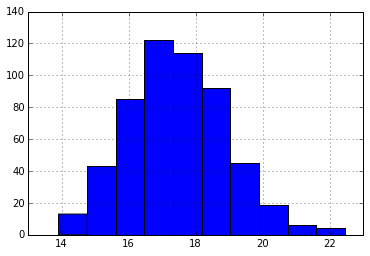

In [10]:
y.hist()

In [11]:
from ml import utilities as ml_utils
import imp
imp.reload(ml_utils)

<module 'ml.utilities' from '/Users/eczech/repos/portfolio/functional/ml/python/ml/utilities.py'>

In [12]:
X_ohe = ml_utils.get_one_hot_features(X)
X_ohe.head()

,A buffer.0,A buffer.1,A buffer.2,A buffer.3,A buffer.4,A buffer.5,Buffer Salt 1.0,Buffer Salt 1.1,Buffer Salt 1.2,Buffer Salt 1.3,...,Stabilizer A.0,Stabilizer A.1,Stabilizer A.2,Stabilizer A.3,Stabilizer A.4,Stabilizer B.0,Stabilizer B.1,Stabilizer B.2,Stabilizer B.3,WFI Source.0
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [13]:
X_int = ml_utils.get_polynomial_features(X_ohe, degree=2, interaction_only=True)
X_int = X_int.loc[:,X_int.apply(lambda x: not np.all(x == 0))]
print(X_int.shape)
X_int.head()

(543, 4705)


,Intercept,A buffer.0,A buffer.1,A buffer.2,A buffer.3,A buffer.4,A buffer.5,Buffer Salt 1.0,Buffer Salt 1.1,Buffer Salt 1.2,...,Stabilizer A.2 x WFI Source.0,Stabilizer A.3 x Stabilizer B.2,Stabilizer A.3 x Stabilizer B.3,Stabilizer A.3 x WFI Source.0,Stabilizer A.4 x Stabilizer B.3,Stabilizer A.4 x WFI Source.0,Stabilizer B.0 x WFI Source.0,Stabilizer B.1 x WFI Source.0,Stabilizer B.2 x WFI Source.0,Stabilizer B.3 x WFI Source.0
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [153]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.grid_search import GridSearchCV
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
KNeighborsRegressor()

In [159]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.grid_search import GridSearchCV

elasticnet_grid = {'l1_ratio': [.01, .1, .5, .9, .99], 'alpha': [.01, .1, 1, 10]}
gbr_grid = {'n_estimators': [100, 250, 1000], 'learning_rate': [.001, .01, .1]}
svm_grid = {'C': [.01, .1, 1, 10, 100], 'degree': [1,2]}
knn_grid = {'n_neighbors': [3, 5, 10, 25, 50], 'weights': ['uniform', 'distance'], 'p': [1,2,3]}
clfs = {
    'elasticnet': GridSearchCV(ElasticNet(max_iter=10000), elasticnet_grid, cv=10, n_jobs=-1), 
    'ridge': GridSearchCV(Ridge(), {'alpha': [.1, 1, 10]}, cv=10, n_jobs=1),
#    'lasso': GridSearchCV(LassoCV(max_iter=10000), {'n_alphas': [100]}, cv=10, n_jobs=1),
    'svm': GridSearchCV(SVR(kernel='linear'), svm_grid, cv=10, n_jobs=-1),
    'gbr': GridSearchCV(GradientBoostingRegressor(max_depth=1), gbr_grid, cv=10, n_jobs=-1),
    'rf': GridSearchCV(RandomForestRegressor(max_depth=1), {'n_estimators': [100, 250, 1000]}, cv=10, n_jobs=-1),
    'extratrees': GridSearchCV(ExtraTreesRegressor(max_depth=2), {'n_estimators': [100, 250]}, cv=10, n_jobs=-1)
}

In [160]:
res = {}
for clf in clfs.keys():
    res[clf] = clfs[clf].fit(X_ohe, y)
res['svm']

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'degree': [1, 2], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [161]:
x = res['extratrees']
x.best_params_

{'n_estimators': 250}

Check predictions:

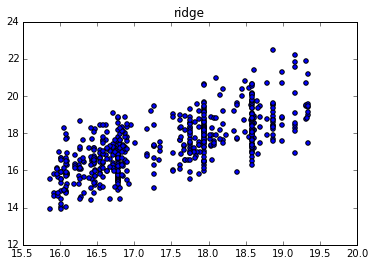

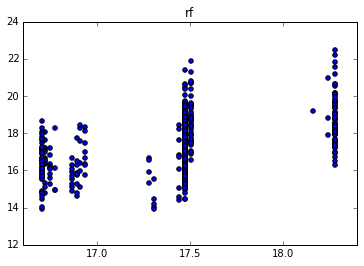

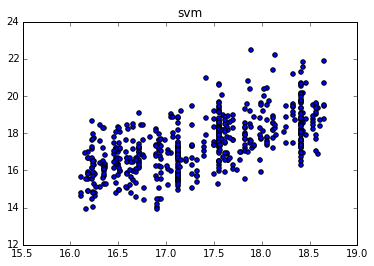

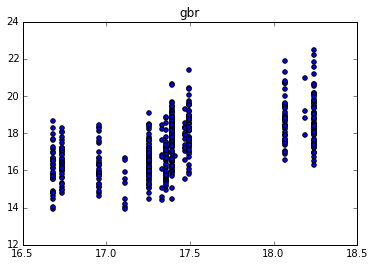

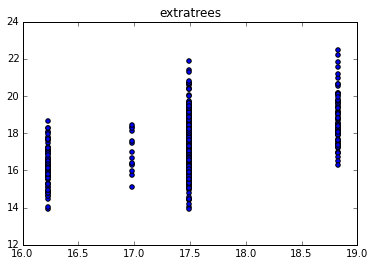

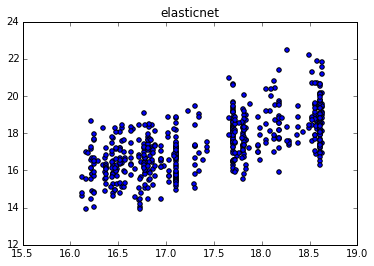

In [163]:
for clf in res.keys():
    y_pred = res[clf].best_estimator_.predict(X_ohe)
    plt.figure()
    plt.scatter(y_pred, y)
    ax = plt.gca()
    ax.set_title(clf)

Check feature importances:

In [164]:
def get_feat_imps(cols, clf):
    res = None
    if hasattr(clf, 'coef_'):
        if isinstance(clf, SVR):
            res = pd.Series(clf.coef_.T[:,0], index=cols)
        else:
            res = pd.Series(clf.coef_, index=cols)
    elif hasattr(clf, 'feature_importances_'):
        res = pd.Series(clf.feature_importances_, index=cols)
    else:
        res = None
    if res is None:
        return None
    res.name = type(clf).__name__
    return res

In [165]:
feat_imps = []
for clf in res.keys():
    r = get_feat_imps(X_ohe.columns, res[clf].best_estimator_)
    #r.name = clf
    feat_imps.append(r)
feat_imps = pd.DataFrame(feat_imps)
feat_imps.index.name = 'Algorithm'
feat_imps

,A buffer.0,A buffer.1,A buffer.2,A buffer.3,A buffer.4,A buffer.5,Buffer Salt 1.0,Buffer Salt 1.1,Buffer Salt 1.2,Buffer Salt 1.3,...,Stabilizer A.0,Stabilizer A.1,Stabilizer A.2,Stabilizer A.3,Stabilizer A.4,Stabilizer B.0,Stabilizer B.1,Stabilizer B.2,Stabilizer B.3,WFI Source.0
Algorithm,,,,,,,,,,,,,,,,,,,,,
Ridge,-0.142805,0.088802,-0.050112,-0.041210,-0.086339,0.231663,-0.123256,0.109498,0.072572,0.099930,...,0.100927,-0.061635,0.062998,-0.040797,-0.061494,-0.090352,0.167124,-0.071488,-0.005284,0.000000e+00
RandomForestRegressor,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
SVR,-0.028185,0.018202,0.026864,-0.038979,-0.101732,0.123830,-0.027964,0.057980,-0.043263,0.080128,...,0.021815,-0.025062,0.028238,-0.028821,0.003830,-0.008185,0.025066,-0.008979,-0.007902,2.428613e-17
GradientBoostingRegressor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
ExtraTreesRegressor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
ElasticNet,-0.003805,0.045506,0.000000,-0.066381,-0.102641,0.178494,-0.004592,0.071473,-0.000000,0.091459,...,0.000000,-0.000000,0.013799,-0.015942,0.000000,0.000000,0.007406,-0.044026,0.000000,0.000000e+00


In [166]:
feats = pd.melt(feat_imps.reset_index(), id_vars=['Algorithm'], var_name='Feature', value_name='Value')
feats.head()

,Algorithm,Feature,Value
0,Ridge,A buffer.0,-0.142805
1,RandomForestRegressor,A buffer.0,0.000000
2,SVR,A buffer.0,-0.028185
3,GradientBoostingRegressor,A buffer.0,0.000000
4,ExtraTreesRegressor,A buffer.0,0.000000


In [167]:
feats.to_csv('/tmp/feats.csv', index=False)
# Processing with /Users/eczech/repos/portfolio/demonstrative/R/meetups/qc_analytics/feature_importances.R

In [93]:
%load_ext rpy2.ipython